In [1]:
import re
import numpy as np
import pandas as pd
import seaborn as sns

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [2]:
nltk.download('punkt')
nltk.download('stopwords')

dataset = pd.read_csv('car_reviews.csv')

ps = PorterStemmer()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\neelp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\neelp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
#example showing words and punctuation have been excluded and the rest of the text has not been handled in a case sensitive way
original_text = dataset['Review'][0]
cleaned_text = original_text.lower()
cleaned_text = re.sub('[^A-Za-z]', ' ', cleaned_text)
tokenized_text = word_tokenize(cleaned_text)

processed_text = [ps.stem(word) for word in tokenized_text if word not in set(stopwords.words('english'))]
final_text = " ".join(processed_text)

print(original_text)
print('')
print(final_text)

 In 1992 we bought a new Taurus and we really loved it  So in 1999 we decided to try a new Taurus  I did not care for the style of the newer version  but bought it anyway I do not like the new car half as much as i liked our other one  Thee dash is much to deep and takes up a lot of room  I do not find the seats as comfortable and the way the sides stick out further than the strip that should protect your card from denting It drives nice and has good pick up  But you can not see the hood at all from the driver seat and judging and parking is difficult  It has a very small gas tank I would not buy a Taurus if I had it to do over  I would rather have my 1992 back  I dont think the style is as nice as the the 1992  and it was a mistake to change the style  In less than a month we had a dead battery and a flat tire 

bought new tauru realli love decid tri new tauru care style newer version bought anyway like new car half much like one thee dash much deep take lot room find seat comfort way

In [4]:
#example showing how words with variations of the same stem are reduced to their common stem
word1_list = ['connections', 'connected', 'connecting', 'connection']
word2_list = ['likes', 'liked', 'liking', 'likely']
word3_list = ['programer', 'programs', 'programming', 'programers']

stem1_list = [ps.stem(word) for word in word1_list]
stem2_list = [ps.stem(word) for word in word2_list]
stem3_list = [ps.stem(word) for word in word3_list]

print(str(word1_list) + ' ----> ' + str(stem1_list))
print(str(word2_list) + ' ----------------------> ' + str(stem2_list))
print(str(word3_list) + ' ------> ' + str(stem3_list))

['connections', 'connected', 'connecting', 'connection'] ----> ['connect', 'connect', 'connect', 'connect']
['likes', 'liked', 'liking', 'likely'] ----------------------> ['like', 'like', 'like', 'like']
['programer', 'programs', 'programming', 'programers'] ------> ['program', 'program', 'program', 'program']


In [5]:
data = []

for i in range(dataset.shape[0]):
    text = dataset.iloc[i, 1]
    text = re.sub('[^A-Za-z]', ' ', text)
    text = text.lower()
    tokenized_text = word_tokenize(text)
    
    processed_text = [ps.stem(word) for word in tokenized_text if word not in set(stopwords.words('english'))]
            
    final_text = " ".join(processed_text)
    data.append(final_text)

In [6]:
from IPython.display import display

for i in range(3):
    text = [dataset['Review'][i]]
    vect = CountVectorizer()
    X = vect.fit_transform(text)
    DF = pd.DataFrame(X.A, columns=vect.get_feature_names())
    print('The count vector for review ' + str(i) + ' is:')
    print('')
    display(DF)

The count vector for review 0 is:



,1992,1999,all,and,anyway,as,at,back,battery,bought,...,try,up,version,very,was,way,we,would,you,your
0,3,1,1,8,1,5,1,1,1,2,...,1,2,1,1,1,1,4,2,1,1


The count vector for review 1 is:



,115,1999,about,allowed,am,an,and,another,any,anyone,...,was,weigh,well,went,who,with,worked,would,you,your
0,1,2,1,1,3,2,5,1,1,1,...,4,1,1,1,1,1,1,2,6,1


The count vector for review 2 is:



,000,10mpg,1700,1990,200,70,98,about,additional,after,...,went,were,when,where,which,within,work,wrong,yard,years
0,2,1,1,1,1,1,1,4,1,3,...,2,1,3,1,1,3,1,1,1,1


In [7]:
matrix = CountVectorizer()
X = matrix.fit_transform(data).toarray()
Y = dataset.iloc[:, 0]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

print('The number of reviews in the training set is: ' + str(len(X_train)) + '.')
print('The number of reviews in the test set is: ' + str(len(X_test)) + '.')

The number of reviews in the training set is: 1105.
The number of reviews in the test set is: 277.


In [8]:
#I use the inbuilt Multinomial Naive Bayes from sklearn for the classification
classifier = MultinomialNB()
classifier.fit(X_train, Y_train)

Y_pred = classifier.predict(X_test)

cf_matrix = confusion_matrix(Y_test, Y_pred)
class_report = classification_report(Y_test, Y_pred)
accuracy = accuracy_score(Y_test, Y_pred)

print('Accuracy: %.2f%% ' % (accuracy * 100.0))

Accuracy: 81.95% 


<AxesSubplot:>

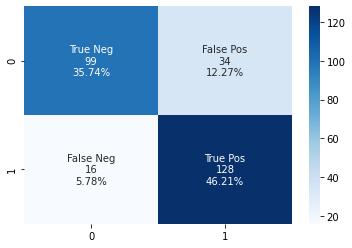

In [9]:
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')